In [239]:
import os
import numpy as np
training_path = 'data/shapes/training'
classes = os.listdir(training_path)
classes

['circle', 'square', 'triangle']

In [240]:
def load_images(path):
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    
    feature = list()
    feature_label = list()
    Images = list()
    
    classes = os.listdir(path)
    for class_name in classes:
        print(f"Reading from {class_name}...")
        
        class_path = path+"/"+class_name
        images_path = os.listdir(class_path)
        
        for image in images_path:
            images = class_path+"/"+image
            img = plt.imread(images)
            feature.append(img.ravel())
            Images.append(img)
            feature_label.append(class_name)
            
    return np.array(Images), np.array(feature), np.array(feature_label)
# load_images(training_path)

In [241]:
images, feature, label = load_images(training_path)

Reading from circle...
Reading from square...
Reading from triangle...


In [242]:
print(images.shape)
print(feature.shape)
print(label.shape)

(1200, 128, 128, 3)
(1200, 49152)
(1200,)


circle


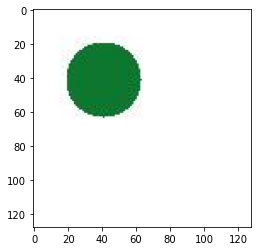

In [243]:
def image_with_label(indx):
    import matplotlib.pyplot as plt
    print(label[indx])
    plt.imshow(images[indx])
    plt.show()
    

image_with_label(67)

In [244]:
y_label = []
for i in label:
    if classes[0] == i:
        y_label.append(0)
    elif classes[1] == i:
        y_label.append(1)
    else:
        y_label.append(2)

Y_label = np.array(y_label)

In [245]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature, Y_label, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(900, 49152)
(300, 49152)
(900,)
(300,)


In [246]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

X_train = x_train.astype("float64")

image_pipline = Pipeline([("Norm", MinMaxScaler()),
                            ("Classify", DecisionTreeClassifier())])

print("Model Training...")
clf = image_pipline.fit(X_train, y_train)
print("Classifier Trained !")

Model Training...
Classifier Trained !


In [247]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

X_test = x_test.astype("float64")

prediction = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, prediction))
print("-------------")
print((metrics.accuracy_score(y_test, prediction))*100)

[[ 78   7   1]
 [ 11  97   0]
 [  0   0 106]]
-------------
93.66666666666667



 Confusion Matrix:


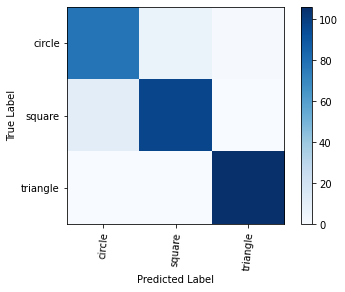

In [248]:
classnames = classes
print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, np.round(prediction, 0))
# Plot confusion matrix as heatmap
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Loading Testing Image

In [249]:
from PIL import Image
testing_source_file = 'data/shapes/test'
test_image = os.listdir(testing_source_file)
Test_image = list()
for i in test_image:
    test_image_path = testing_source_file+"/"+i
    test_images = Image.open(test_image_path)
    Test_image.append(test_images)
    print(test_image_path)

data/shapes/test/test_circle1.jpg
data/shapes/test/test_circle2.jpg
data/shapes/test/test_square1.jpg
data/shapes/test/test_square2.jpg
data/shapes/test/test_triangle1.jpg
data/shapes/test/test_triangle2.jpg


In [250]:
def resize_image(src_img, size=(128,128), bg_color="white"): 
    from PIL import Image
    
#     src_img = Image.fromarray(src_img)
    # rescale the image so the longest edge is the right size
    src_img.thumbnail(size, Image.ANTIALIAS)
    
    # Create a new image of the right shape
    new_image = Image.new("RGB", size, bg_color)
    
    # Paste the rescaled image onto the new background
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))
  
    # return the resized image
    return new_image

In [251]:
def image_testing(indx):
#     print(len(Test_image))
    img = Test_image[indx]
    resized_img = np.array(resize_image(img))
    img_shape = np.array(resized_img).shape
#     print(img_shape)
    flatten_img = resized_img.ravel()
#     print(flatten_img.shape)
    test_flatten_img = [flatten_img]
    return test_flatten_img, img

[2]


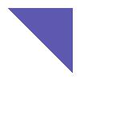

In [261]:
test_flatten_img, img = image_testing(5)
print(clf.predict(test_flatten_img))
img